![Hand_Sing.png](https://datasciencecc.s3.us-east-2.amazonaws.com/Hand-Sign.png)


In [2]:
import csv
import string
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Download the training and test sets (the test set will actually be used as a validation set):

In [3]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

zsh:1: command not found: gdown
zsh:1: command not found: gdown


Define some globals with the path to both files you just downloaded:

In [4]:
train = pd.read_csv('./sign_mnist_train.csv')
test= pd.read_csv('./sign_mnist_test.csv')
train.shape , test.shape

((27455, 785), (7172, 785))

Unlike previous assignments, you will not have the actual images provided, instead you will have the data serialized as `csv` files.

Take a look at how the data looks like within the `csv` file:

In [5]:
TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [9]:
# grader-required-cell

# GRADED FUNCTION: parse_data_from_input
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:


    csv_reader = csv.reader(file, delimiter=',')
    
    # Initialize lists to store labels and images
    images = []
    labels = []

    next(csv_reader, None)

    for row in csv_reader:
        label = row[0]
        data = row[1:]
        img = np.array(data).reshape((28, 28))

        images.append(img)
        labels.append(label)

    images = np.array(images).astype(float)
    labels = np.array(labels).astype(float)

    return images, labels

In [10]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


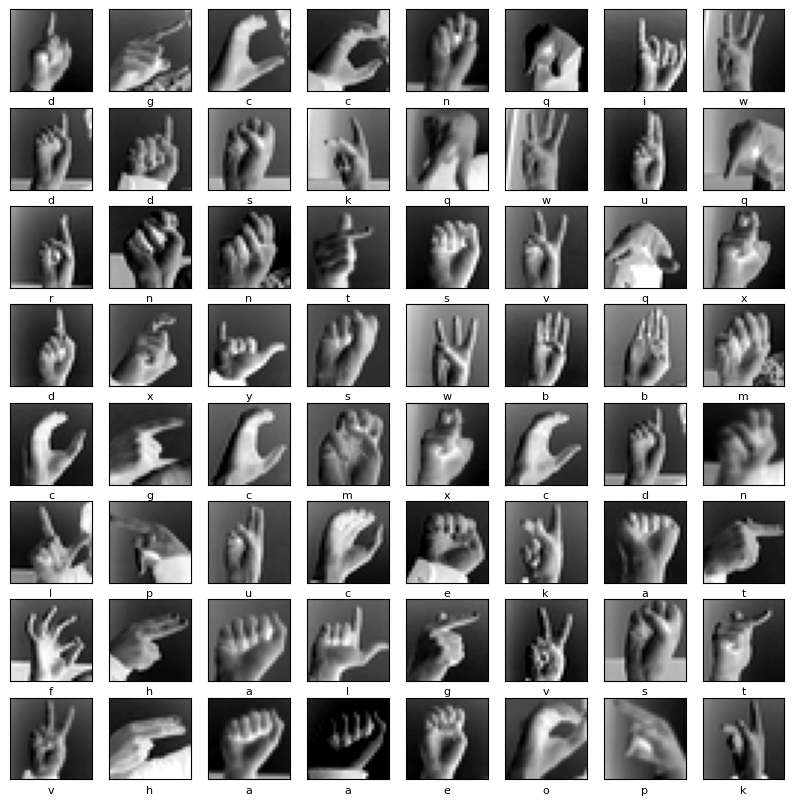

In [11]:
plt.figure(figsize = (10,10))
letters = list(string.ascii_lowercase)
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i],cmap = plt.cm.binary)
    plt.xlabel(f"{letters[int(training_labels[i])]}",fontsize=8)
plt.show()

In [12]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):


  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)


  validation_datagen = ImageDataGenerator(
    rescale=1./255,)

  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

  return train_generator, validation_generator

In [13]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [14]:
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Conv2D(128,(2,2)),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(1024,activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(26,activation='softmax')
  ])




  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

In [15]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 14s 16ms/step - loss: 2.4801 - acc: 0.2176 - val_loss: 1.3819 - val_acc: 0.5199
Epoch 2/15
858/858 [==============================] - 14s 16ms/step - loss: 1.3615 - acc: 0.5422 - val_loss: 0.7145 - val_acc: 0.7467
Epoch 3/15
858/858 [==============================] - 14s 16ms/step - loss: 0.8878 - acc: 0.6950 - val_loss: 0.4111 - val_acc: 0.8475
Epoch 4/15
858/858 [==============================] - 14s 16ms/step - loss: 0.6650 - acc: 0.7704 - val_loss: 0.2996 - val_acc: 0.8933
Epoch 5/15
858/858 [==============================] - 14s 16ms/step - loss: 0.5520 - acc: 0.8087 - val_loss: 0.1871 - val_acc: 0.9353
Epoch 6/15
858/858 [==============================] - 14s 17ms/step - loss: 0.4719 - acc: 0.8383 - val_loss: 0.1802 - val_acc: 0.9350
Epoch 7/15
858/858 [==============================] - 14s 17ms/step - loss: 0.4220 - acc: 0.8560 - val_loss: 0.3032 - val_acc: 0.9018
Epoch 8/15
858/858 [==============================] - 15s 17ms

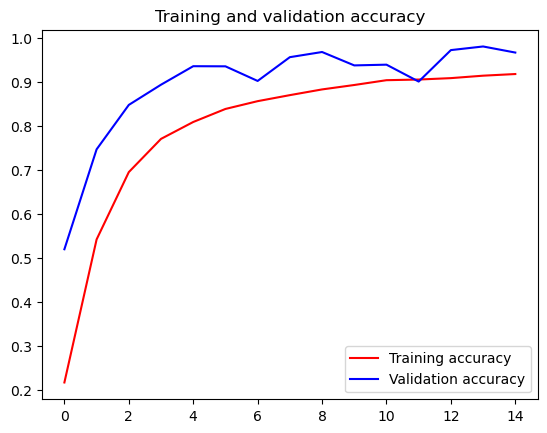

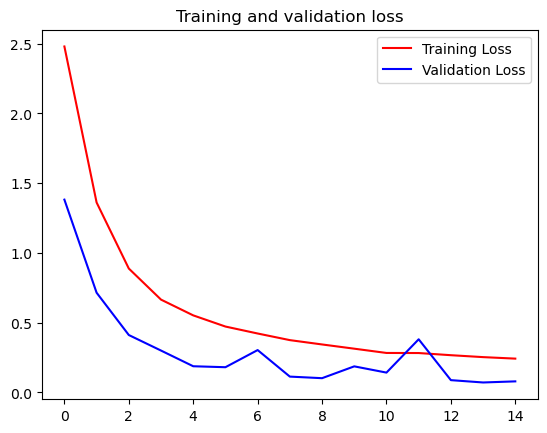

In [17]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()